<span style="font-family: Arial; font-size: 20pt; display: block;text-align: center;">**Time Series Forecasting for Energy Consumption: Optimizing Resource Allocation in Smart Grid Systems**</span>
<span style="font-family: Arial; font-size: 12pt; display: block;text-align: center;">**Mohamad Aslam.N, Entri Elevate, 17-May-2024**</span>



# Introduction:

In today's dynamic energy landscape, the efficient management of electricity grids is pivotal for ensuring sustainability, reliability, and cost-effectiveness. The emergence of smart grid systems has opened avenues for leveraging data-driven approaches to optimize energy distribution and resource allocation. This project endeavors to address these challenges by developing a robust time series forecasting model for predicting energy consumption patterns in smart grid systems.

Harnessing historical data encompassing energy usage, weather conditions, holidays, and other pertinent factors, our model aims to accurately forecast future energy consumption trends. By delving into the intricate interplay of these variables, we aspire to provide grid operators and energy stakeholders with actionable insights to enhance decision-making processes.



# Problem Statement:
 This project aims to develop a time series forecasting model for predicting energy consumption
 patterns in smart grid systems. By leveraging historical data on energy usage, weather
 conditions, holidays, and other relevant factors, the model seeks to forecast future energy
 consumption accurately. The goal is to optimize energy distribution and resource allocation,
 enabling efficient management of electricity grids. By forecasting energy consumption patterns,
 this project contributes to reducing costs, improving grid reliability, and promoting sustainability in
 energy management.

# Objectives:
The ultimate objective of this project is to contribute towards mitigating costs, bolstering grid reliability, and fostering sustainability in energy management practices. Through precise forecasting of energy consumption patterns, we aspire to empower stakeholders to proactively allocate resources, optimize grid operations, and drive towards a more resilient and efficient energy ecosystem.



In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('energy_consumption.csv')

In [3]:
df

,Date/Time,Temperature,Humidity,Day of Week,Time of Day,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption
0,2020-01-01 00:00:00,17.440675,73.264794,Wednesday,00:00,Fall,1,4437.698981,1799.303909,0.123206,12.228164,0.059692,169.032542,1469.402213,1367.517344
1,2020-01-01 01:00:00,25.759468,29.280938,Wednesday,01:00,Spring,1,2240.248004,2109.917892,0.096013,14.950992,19.246831,705.612502,169.805891,4078.500517
2,2020-01-01 02:00:00,20.138169,55.772252,Wednesday,02:00,Winter,0,1443.646518,2814.549791,0.161145,11.384525,10.978002,268.142230,1988.009121,4614.282050
3,2020-01-01 03:00:00,17.244159,87.520015,Wednesday,03:00,Summer,0,2325.184898,4680.163261,0.272355,10.109367,2.472984,262.186871,174.970181,3578.730578
4,2020-01-01 04:00:00,11.182740,26.383045,Wednesday,04:00,Fall,0,1552.041035,4080.463060,0.163503,9.012346,4.509169,486.224719,1004.081112,4194.210499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,2024-12-30 20:00:00,16.224974,45.931201,Monday,20:00,Summer,1,3299.135828,3069.518353,0.135656,12.340619,3.685611,666.593466,1538.228889,1087.122191
43821,2024-12-30 21:00:00,-2.638805,64.145829,Monday,21:00,Fall,0,1435.657343,1185.862843,0.238843,11.169718,6.561095,772.779958,1641.830840,4277.546615
43822,2024-12-30 22:00:00,23.730335,70.776912,Monday,22:00,Spring,0,3441.205510,3003.358652,0.209155,15.948723,7.276048,567.131701,1800.057131,2915.121073
43823,2024-12-30 23:00:00,12.921507,40.567168,Monday,23:00,Spring,0,1200.156417,4850.113450,0.286449,14.597026,7.211708,27.142705,926.475955,2944.563179


#  Data Analysis

In [4]:
df.shape

(43825, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43825 entries, 0 to 43824
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date/Time                           43825 non-null  object 
 1   Temperature                         43825 non-null  float64
 2   Humidity                            43825 non-null  float64
 3   Day of Week                         43825 non-null  object 
 4   Time of Day                         43825 non-null  object 
 5   Season                              43825 non-null  object 
 6   Holiday Indicator                   43825 non-null  int64  
 7   Previous Day's Energy Consumption   43825 non-null  float64
 8   Previous Week's Energy Consumption  43825 non-null  float64
 9   Energy Price                        43825 non-null  float64
 10  Daylight Hours                      43825 non-null  float64
 11  Wind Speed                          43825

In [6]:
df.columns

Index(['Date/Time', 'Temperature', 'Humidity', 'Day of Week', 'Time of Day',
       'Season', 'Holiday Indicator', 'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption'],
      dtype='object')

In [7]:
df.describe()

,Temperature,Humidity,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption
count,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000
mean,14.890011,55.001300,0.050633,3004.992815,3007.367131,0.174295,11.979391,9.968398,498.817391,1023.628163,3008.245695
std,14.476096,20.201569,0.219250,1150.099329,1158.462428,0.072037,2.310568,5.787710,288.424913,562.421323,1153.422006
min,-9.996378,20.000232,0.000000,1000.251530,1000.054170,0.050005,8.000024,0.000416,0.035109,50.011787,1000.033142
25%,2.318324,37.402173,0.000000,2013.068826,1995.962354,0.111768,9.968250,4.956682,248.935625,537.001881,2012.751540
50%,14.886739,54.965030,0.000000,3013.983220,3012.369499,0.174438,11.971855,9.933075,499.333064,1021.824580,3017.398352
75%,27.454544,72.478944,0.000000,4004.036776,4014.428878,0.236505,13.978746,14.962423,748.138519,1511.251895,4008.610275
max,39.998898,89.997775,1.000000,4999.898186,4999.996048,0.299999,15.999874,19.999240,999.927153,1999.989309,4999.915113


In [8]:
df.describe(include=["object", "bool"])

,Date/Time,Day of Week,Time of Day,Season
count,43825,43825,43825,43825
unique,43825,7,24,4
top,2020-01-01 00:00:00,Wednesday,00:00,Spring
freq,1,6264,1827,11147


In [9]:
df['Season'].value_counts()

Season
Spring    11147
Summer    10934
Fall      10925
Winter    10819
Name: count, dtype: int64

In [10]:
df['Holiday Indicator'].value_counts()

Holiday Indicator
0    41606
1     2219
Name: count, dtype: int64

In [11]:
df.loc[0:5,'Daylight Hours':'Energy Consumption']

,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption
0,12.228164,0.059692,169.032542,1469.402213,1367.517344
1,14.950992,19.246831,705.612502,169.805891,4078.500517
2,11.384525,10.978002,268.142230,1988.009121,4614.282050
3,10.109367,2.472984,262.186871,174.970181,3578.730578
4,9.012346,4.509169,486.224719,1004.081112,4194.210499
5,15.933307,6.964644,454.978481,390.843977,3362.496898


In [12]:
df.dtypes

Date/Time                              object
Temperature                           float64
Humidity                              float64
Day of Week                            object
Time of Day                            object
Season                                 object
Holiday Indicator                       int64
Previous Day's Energy Consumption     float64
Previous Week's Energy Consumption    float64
Energy Price                          float64
Daylight Hours                        float64
Wind Speed                            float64
Solar Irradiance                      float64
Population Density                    float64
Energy Consumption                    float64
dtype: object

In [13]:
df.isnull().sum()

Date/Time                             0
Temperature                           0
Humidity                              0
Day of Week                           0
Time of Day                           0
Season                                0
Holiday Indicator                     0
Previous Day's Energy Consumption     0
Previous Week's Energy Consumption    0
Energy Price                          0
Daylight Hours                        0
Wind Speed                            0
Solar Irradiance                      0
Population Density                    0
Energy Consumption                    0
dtype: int64

In [14]:
zeroes_counts=(df==0).sum()
zeroes_counts

Date/Time                                 0
Temperature                               0
Humidity                                  0
Day of Week                               0
Time of Day                               0
Season                                    0
Holiday Indicator                     41606
Previous Day's Energy Consumption         0
Previous Week's Energy Consumption        0
Energy Price                              0
Daylight Hours                            0
Wind Speed                                0
Solar Irradiance                          0
Population Density                        0
Energy Consumption                        0
dtype: int64

In [15]:
#extract date time componenet
df['Date/Time']=pd.to_datetime(df['Date/Time'])
df['year']=df['Date/Time'].dt.year
df['month']=df['Date/Time'].dt.month
df['day']=df['Date/Time'].dt.day
df['hr']=df['Date/Time'].dt.hour
df['min']=df['Date/Time'].dt.minute
df['sec']=df['Date/Time'].dt.second

df.head()

,Date/Time,Temperature,Humidity,Day of Week,Time of Day,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,...,Wind Speed,Solar Irradiance,Population Density,Energy Consumption,year,month,day,hr,min,sec
0,2020-01-01 00:00:00,17.440675,73.264794,Wednesday,00:00,Fall,1,4437.698981,1799.303909,0.123206,...,0.059692,169.032542,1469.402213,1367.517344,2020,1,1,0,0,0
1,2020-01-01 01:00:00,25.759468,29.280938,Wednesday,01:00,Spring,1,2240.248004,2109.917892,0.096013,...,19.246831,705.612502,169.805891,4078.500517,2020,1,1,1,0,0
2,2020-01-01 02:00:00,20.138169,55.772252,Wednesday,02:00,Winter,0,1443.646518,2814.549791,0.161145,...,10.978002,268.142230,1988.009121,4614.282050,2020,1,1,2,0,0
3,2020-01-01 03:00:00,17.244159,87.520015,Wednesday,03:00,Summer,0,2325.184898,4680.163261,0.272355,...,2.472984,262.186871,174.970181,3578.730578,2020,1,1,3,0,0
4,2020-01-01 04:00:00,11.182740,26.383045,Wednesday,04:00,Fall,0,1552.041035,4080.463060,0.163503,...,4.509169,486.224719,1004.081112,4194.210499,2020,1,1,4,0,0


In [16]:
df.loc[0:5,'year':'sec']

,year,month,day,hr,min,sec
0,2020,1,1,0,0,0
1,2020,1,1,1,0,0
2,2020,1,1,2,0,0
3,2020,1,1,3,0,0
4,2020,1,1,4,0,0
5,2020,1,1,5,0,0


In [17]:
df=df.drop(columns=['Time of Day','Date/Time','min','sec'],axis=1)

In [18]:
df

,Temperature,Humidity,Day of Week,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption,year,month,day,hr
0,17.440675,73.264794,Wednesday,Fall,1,4437.698981,1799.303909,0.123206,12.228164,0.059692,169.032542,1469.402213,1367.517344,2020,1,1,0
1,25.759468,29.280938,Wednesday,Spring,1,2240.248004,2109.917892,0.096013,14.950992,19.246831,705.612502,169.805891,4078.500517,2020,1,1,1
2,20.138169,55.772252,Wednesday,Winter,0,1443.646518,2814.549791,0.161145,11.384525,10.978002,268.142230,1988.009121,4614.282050,2020,1,1,2
3,17.244159,87.520015,Wednesday,Summer,0,2325.184898,4680.163261,0.272355,10.109367,2.472984,262.186871,174.970181,3578.730578,2020,1,1,3
4,11.182740,26.383045,Wednesday,Fall,0,1552.041035,4080.463060,0.163503,9.012346,4.509169,486.224719,1004.081112,4194.210499,2020,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,16.224974,45.931201,Monday,Summer,1,3299.135828,3069.518353,0.135656,12.340619,3.685611,666.593466,1538.228889,1087.122191,2024,12,30,20
43821,-2.638805,64.145829,Monday,Fall,0,1435.657343,1185.862843,0.238843,11.169718,6.561095,772.779958,1641.830840,4277.546615,2024,12,30,21
43822,23.730335,70.776912,Monday,Spring,0,3441.205510,3003.358652,0.209155,15.948723,7.276048,567.131701,1800.057131,2915.121073,2024,12,30,22
43823,12.921507,40.567168,Monday,Spring,0,1200.156417,4850.113450,0.286449,14.597026,7.211708,27.142705,926.475955,2944.563179,2024,12,30,23


# Data Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'


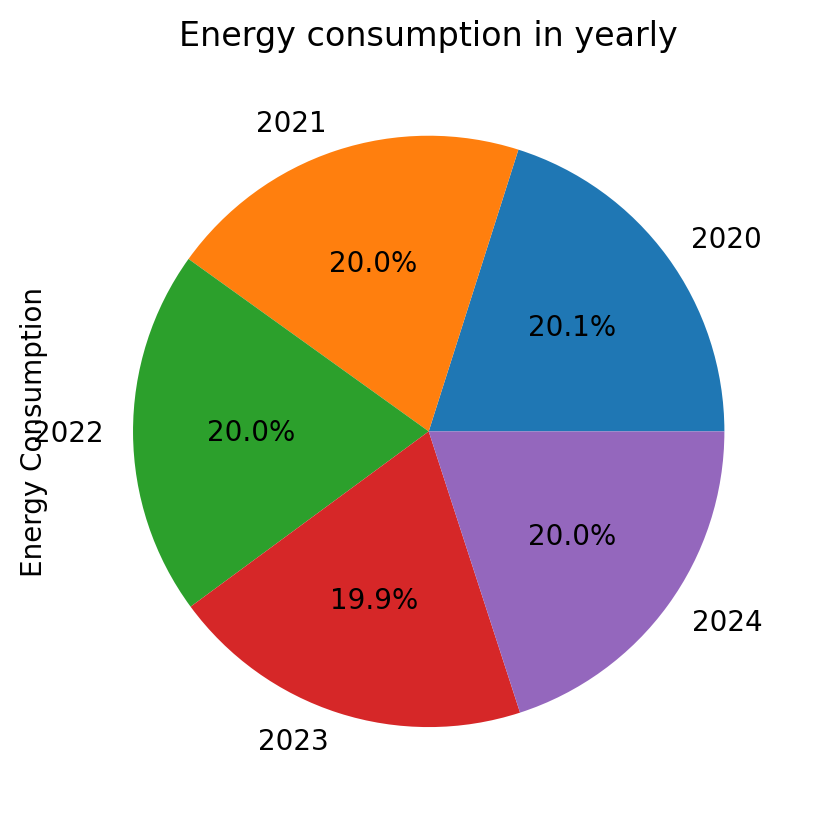

In [20]:
yearly_sum=df.groupby('year')['Energy Consumption'].sum()

yearly_sum.plot(kind='pie',autopct='%1.1f%%')
plt.title('Energy consumption in yearly')
plt.show()

In [21]:
yearly_sum.astype('int')

year
2020    26492381
2021    26362709
2022    26379561
2023    26232094
2024    26369620
Name: Energy Consumption, dtype: int32

In [22]:
monthly_sum=df.groupby('month')['Energy Consumption'].sum()
monthly_sum.astype('int')


month
1     11205764
2     10245504
3     11195766
4     10729924
5     11126446
6     10792518
7     11128957
8     11263909
9     10850867
10    11247045
11    10853177
12    11196485
Name: Energy Consumption, dtype: int32

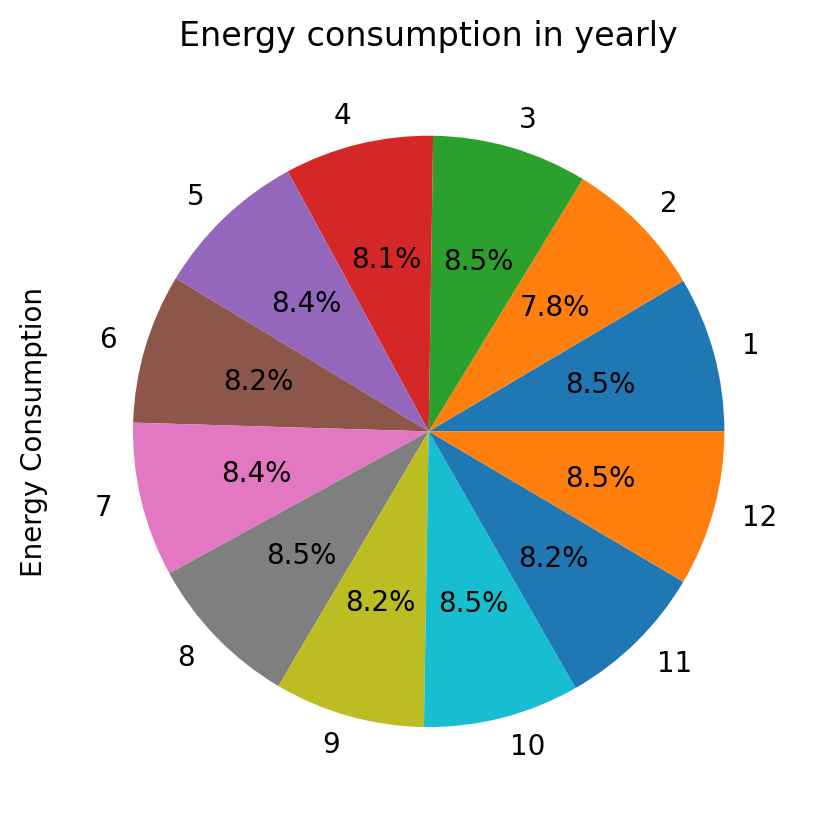

In [23]:
monthly_sum.plot(kind='pie',autopct='%1.1f%%')
plt.title('Energy consumption in yearly')
plt.show()

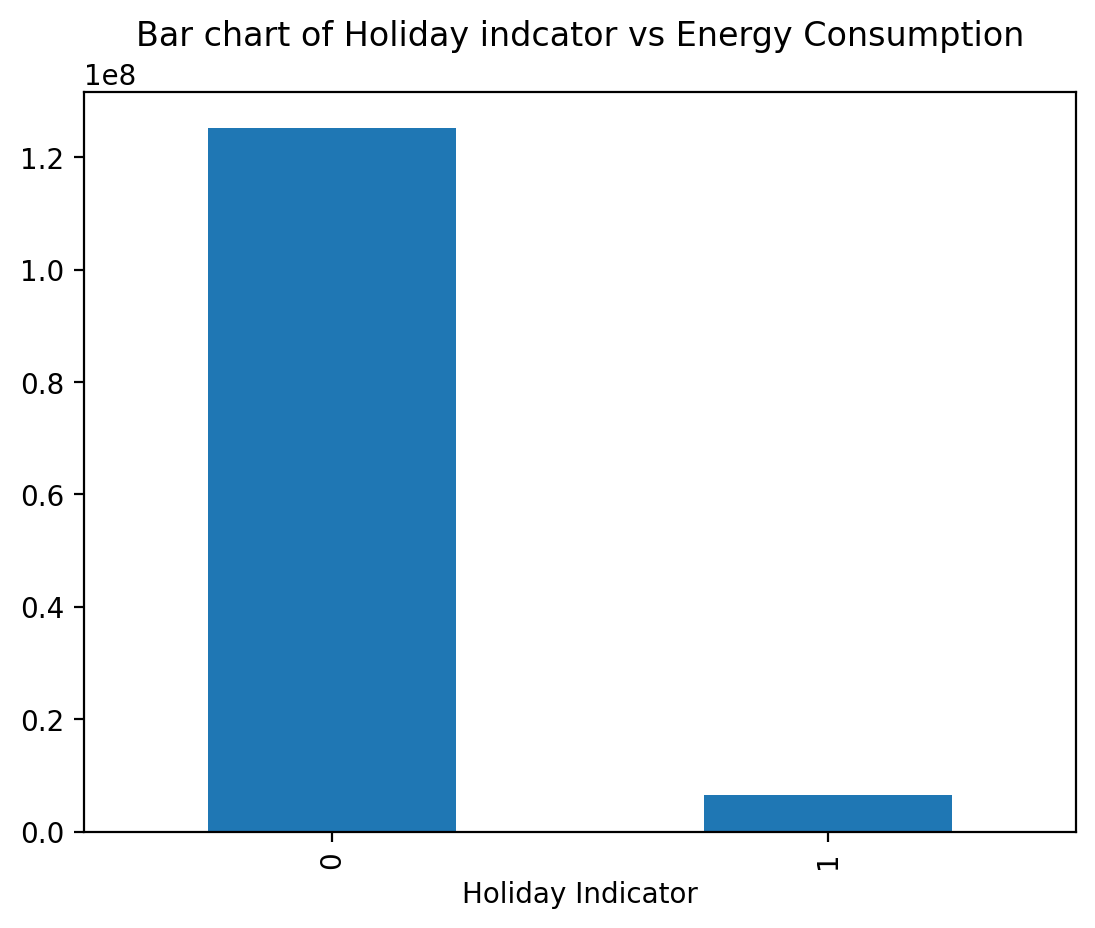

In [24]:
holiday_sum=df.groupby('Holiday Indicator')['Energy Consumption'].sum()

holiday_sum.plot(kind='bar')
plt.title('Bar chart of Holiday indcator vs Energy Consumption')
plt.show()

In [25]:
holiday_sum.astype('int')

Holiday Indicator
0    125244314
1      6592052
Name: Energy Consumption, dtype: int32

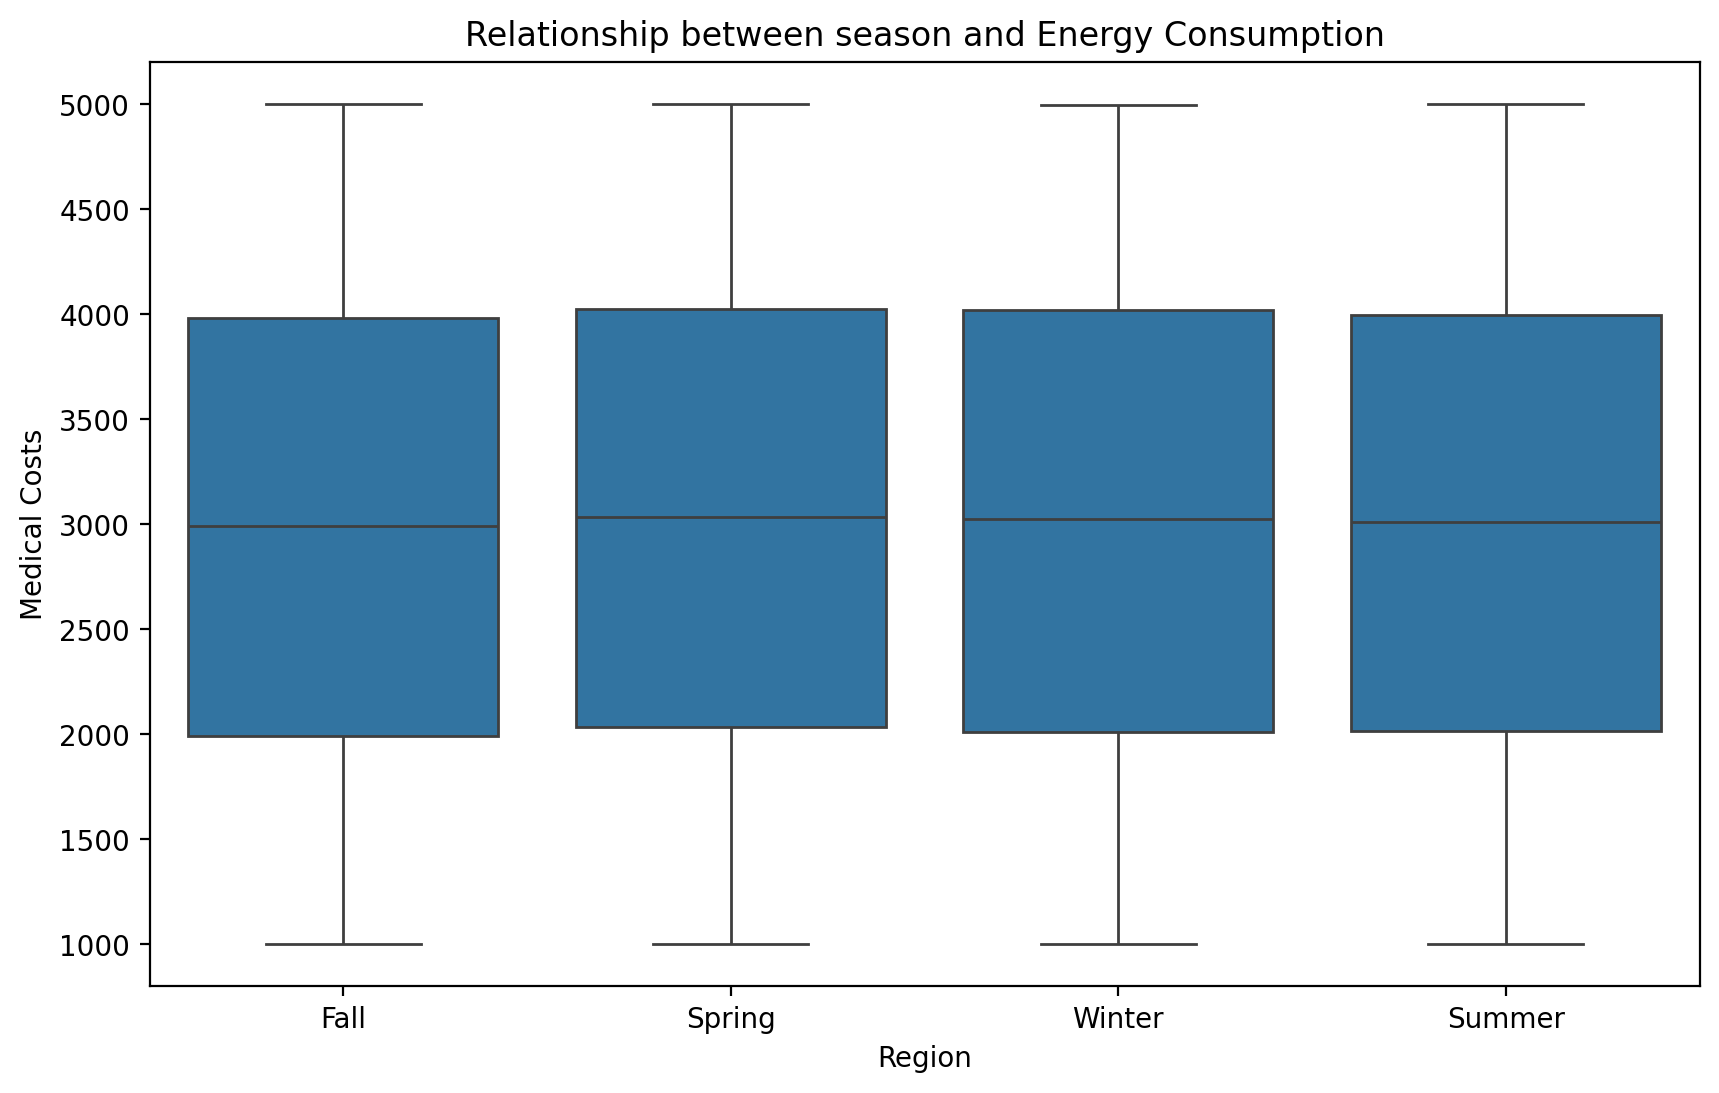

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Energy Consumption', data=df)
plt.title('Relationship between season and Energy Consumption')
plt.xlabel('Region')
plt.ylabel('Medical Costs')
plt.show()

In [27]:
x=df.drop(['Day of Week','Season'],axis=1)

In [28]:
correlation=x.corr()
correlation

,Temperature,Humidity,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption,year,month,day,hr
Temperature,1.000000,-0.000377,-0.001300,0.003740,0.001286,0.003549,0.004406,-0.005132,0.003468,0.006848,-0.011863,0.005971,-0.002793,-0.003504,0.002844
Humidity,-0.000377,1.000000,-0.001927,0.007490,0.000039,-0.004982,-0.009285,0.001708,0.004296,-0.004540,0.004040,0.000766,0.002545,0.008785,-0.002038
Holiday Indicator,-0.001300,-0.001927,1.000000,0.003771,-0.002068,0.005206,-0.006367,0.009768,0.004835,-0.004375,-0.007511,-0.003066,-0.002864,-0.000608,0.003459
Previous Day's Energy Consumption,0.003740,0.007490,0.003771,1.000000,-0.001295,0.001728,-0.001566,0.008900,-0.001468,0.009841,0.000206,0.003927,0.000148,-0.000425,0.000381
Previous Week's Energy Consumption,0.001286,0.000039,-0.002068,-0.001295,1.000000,-0.002121,0.007474,0.002009,0.004796,-0.002326,-0.009924,-0.009421,0.001387,-0.001389,0.002683
Energy Price,0.003549,-0.004982,0.005206,0.001728,-0.002121,1.000000,-0.003550,0.003373,-0.003454,0.011854,0.002338,-0.007019,0.003302,-0.003668,0.003454
Daylight Hours,0.004406,-0.009285,-0.006367,-0.001566,0.007474,-0.003550,1.000000,-0.007024,-0.006873,0.002830,0.007439,-0.004659,0.000666,-0.004584,0.012857
Wind Speed,-0.005132,0.001708,0.009768,0.008900,0.002009,0.003373,-0.007024,1.000000,0.001430,0.001698,-0.003278,0.003121,-0.002395,-0.008175,0.001284
Solar Irradiance,0.003468,0.004296,0.004835,-0.001468,0.004796,-0.003454,-0.006873,0.001430,1.000000,-0.002529,-0.003302,0.000848,-0.007001,-0.003441,0.005955
Population Density,0.006848,-0.004540,-0.004375,0.009841,-0.002326,0.011854,0.002830,0.001698,-0.002529,1.000000,0.000223,-0.001375,-0.001498,0.004663,0.003635


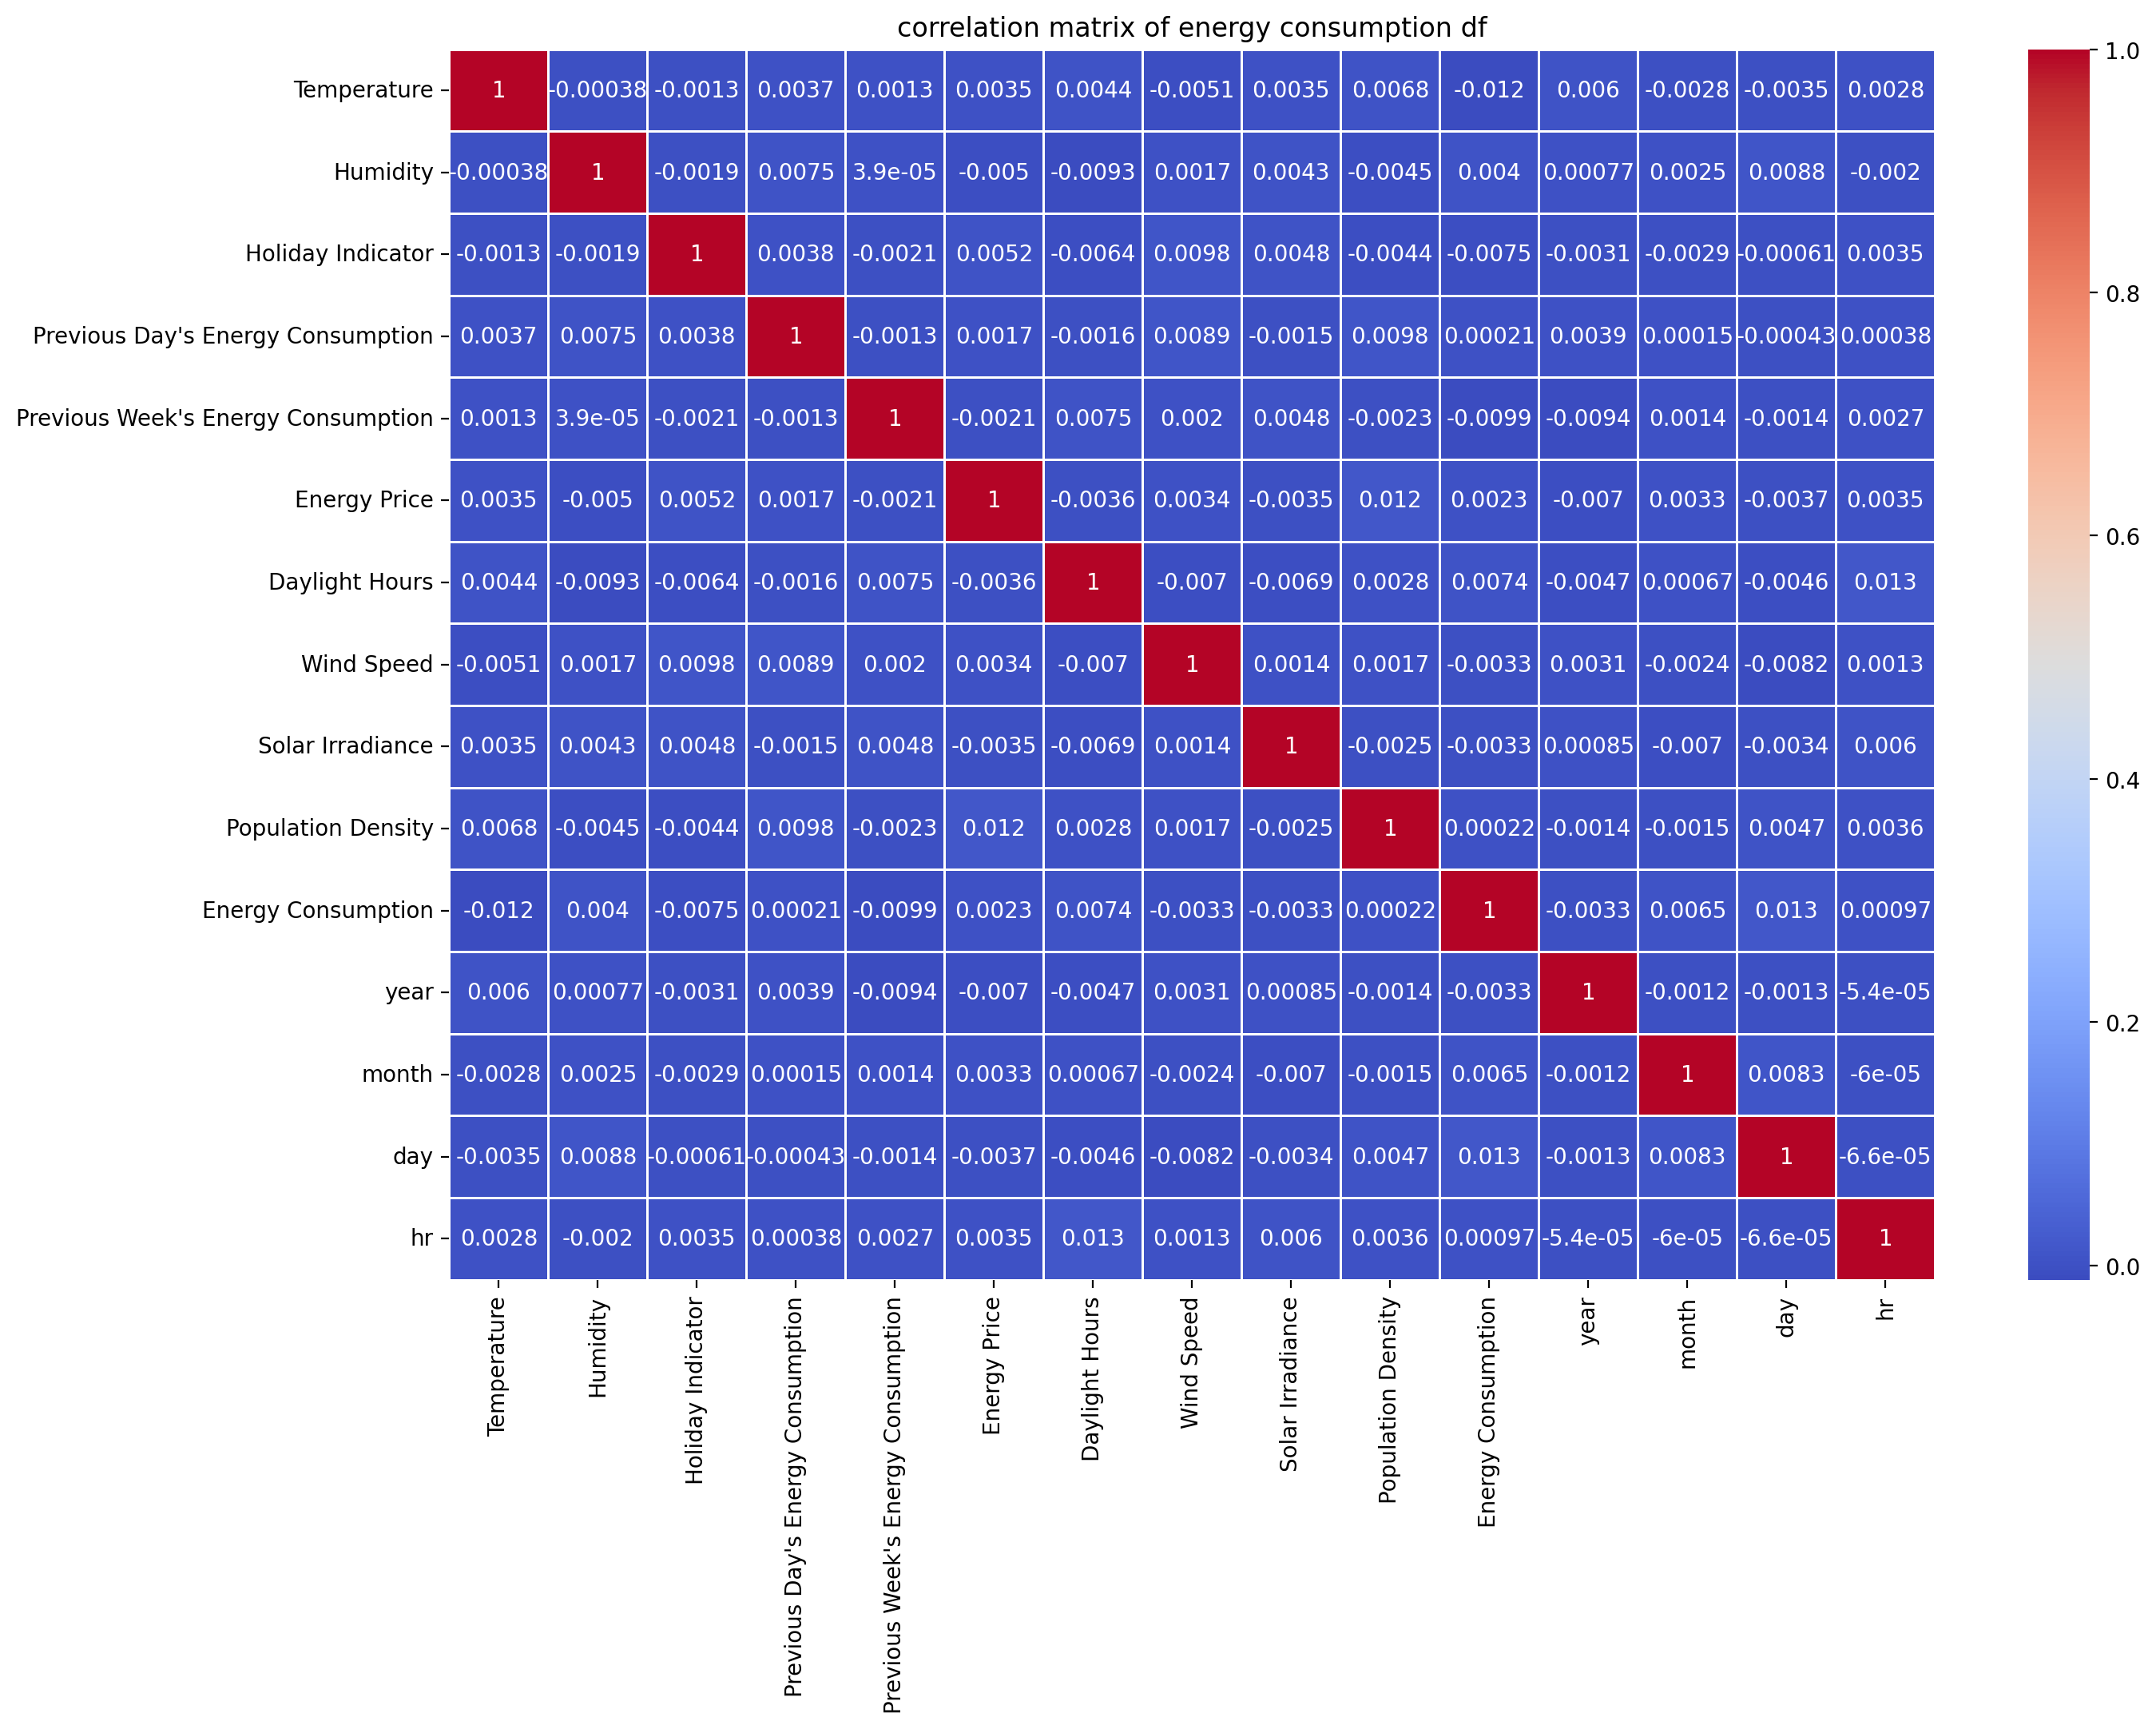

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True, cmap='coolwarm',linewidth=0.5)
plt.title('correlation matrix of energy consumption df')
plt.show()

In [30]:
numeric_df=["Temperature","Humidity","Previous Day's Energy Consumption","Previous Week's Energy Consumption","Energy Price","Daylight Hours",
             "Wind Speed","Solar Irradiance","Population Density","Energy Consumption","year","month","day","hr"]
numeric_df

['Temperature',
 'Humidity',
 "Previous Day's Energy Consumption",
 "Previous Week's Energy Consumption",
 'Energy Price',
 'Daylight Hours',
 'Wind Speed',
 'Solar Irradiance',
 'Population Density',
 'Energy Consumption',
 'year',
 'month',
 'day',
 'hr']

In [31]:
#outlires detection
z_scores = (df[numeric_df] - df[numeric_df].mean()) / df[numeric_df].std()

threshold=3
outliers = (z_scores > threshold) | (z_scores < -threshold)
print("Outliers:")
print(outliers.sum())


Outliers:
Temperature                           0
Humidity                              0
Previous Day's Energy Consumption     0
Previous Week's Energy Consumption    0
Energy Price                          0
Daylight Hours                        0
Wind Speed                            0
Solar Irradiance                      0
Population Density                    0
Energy Consumption                    0
year                                  0
month                                 0
day                                   0
hr                                    0
dtype: int64


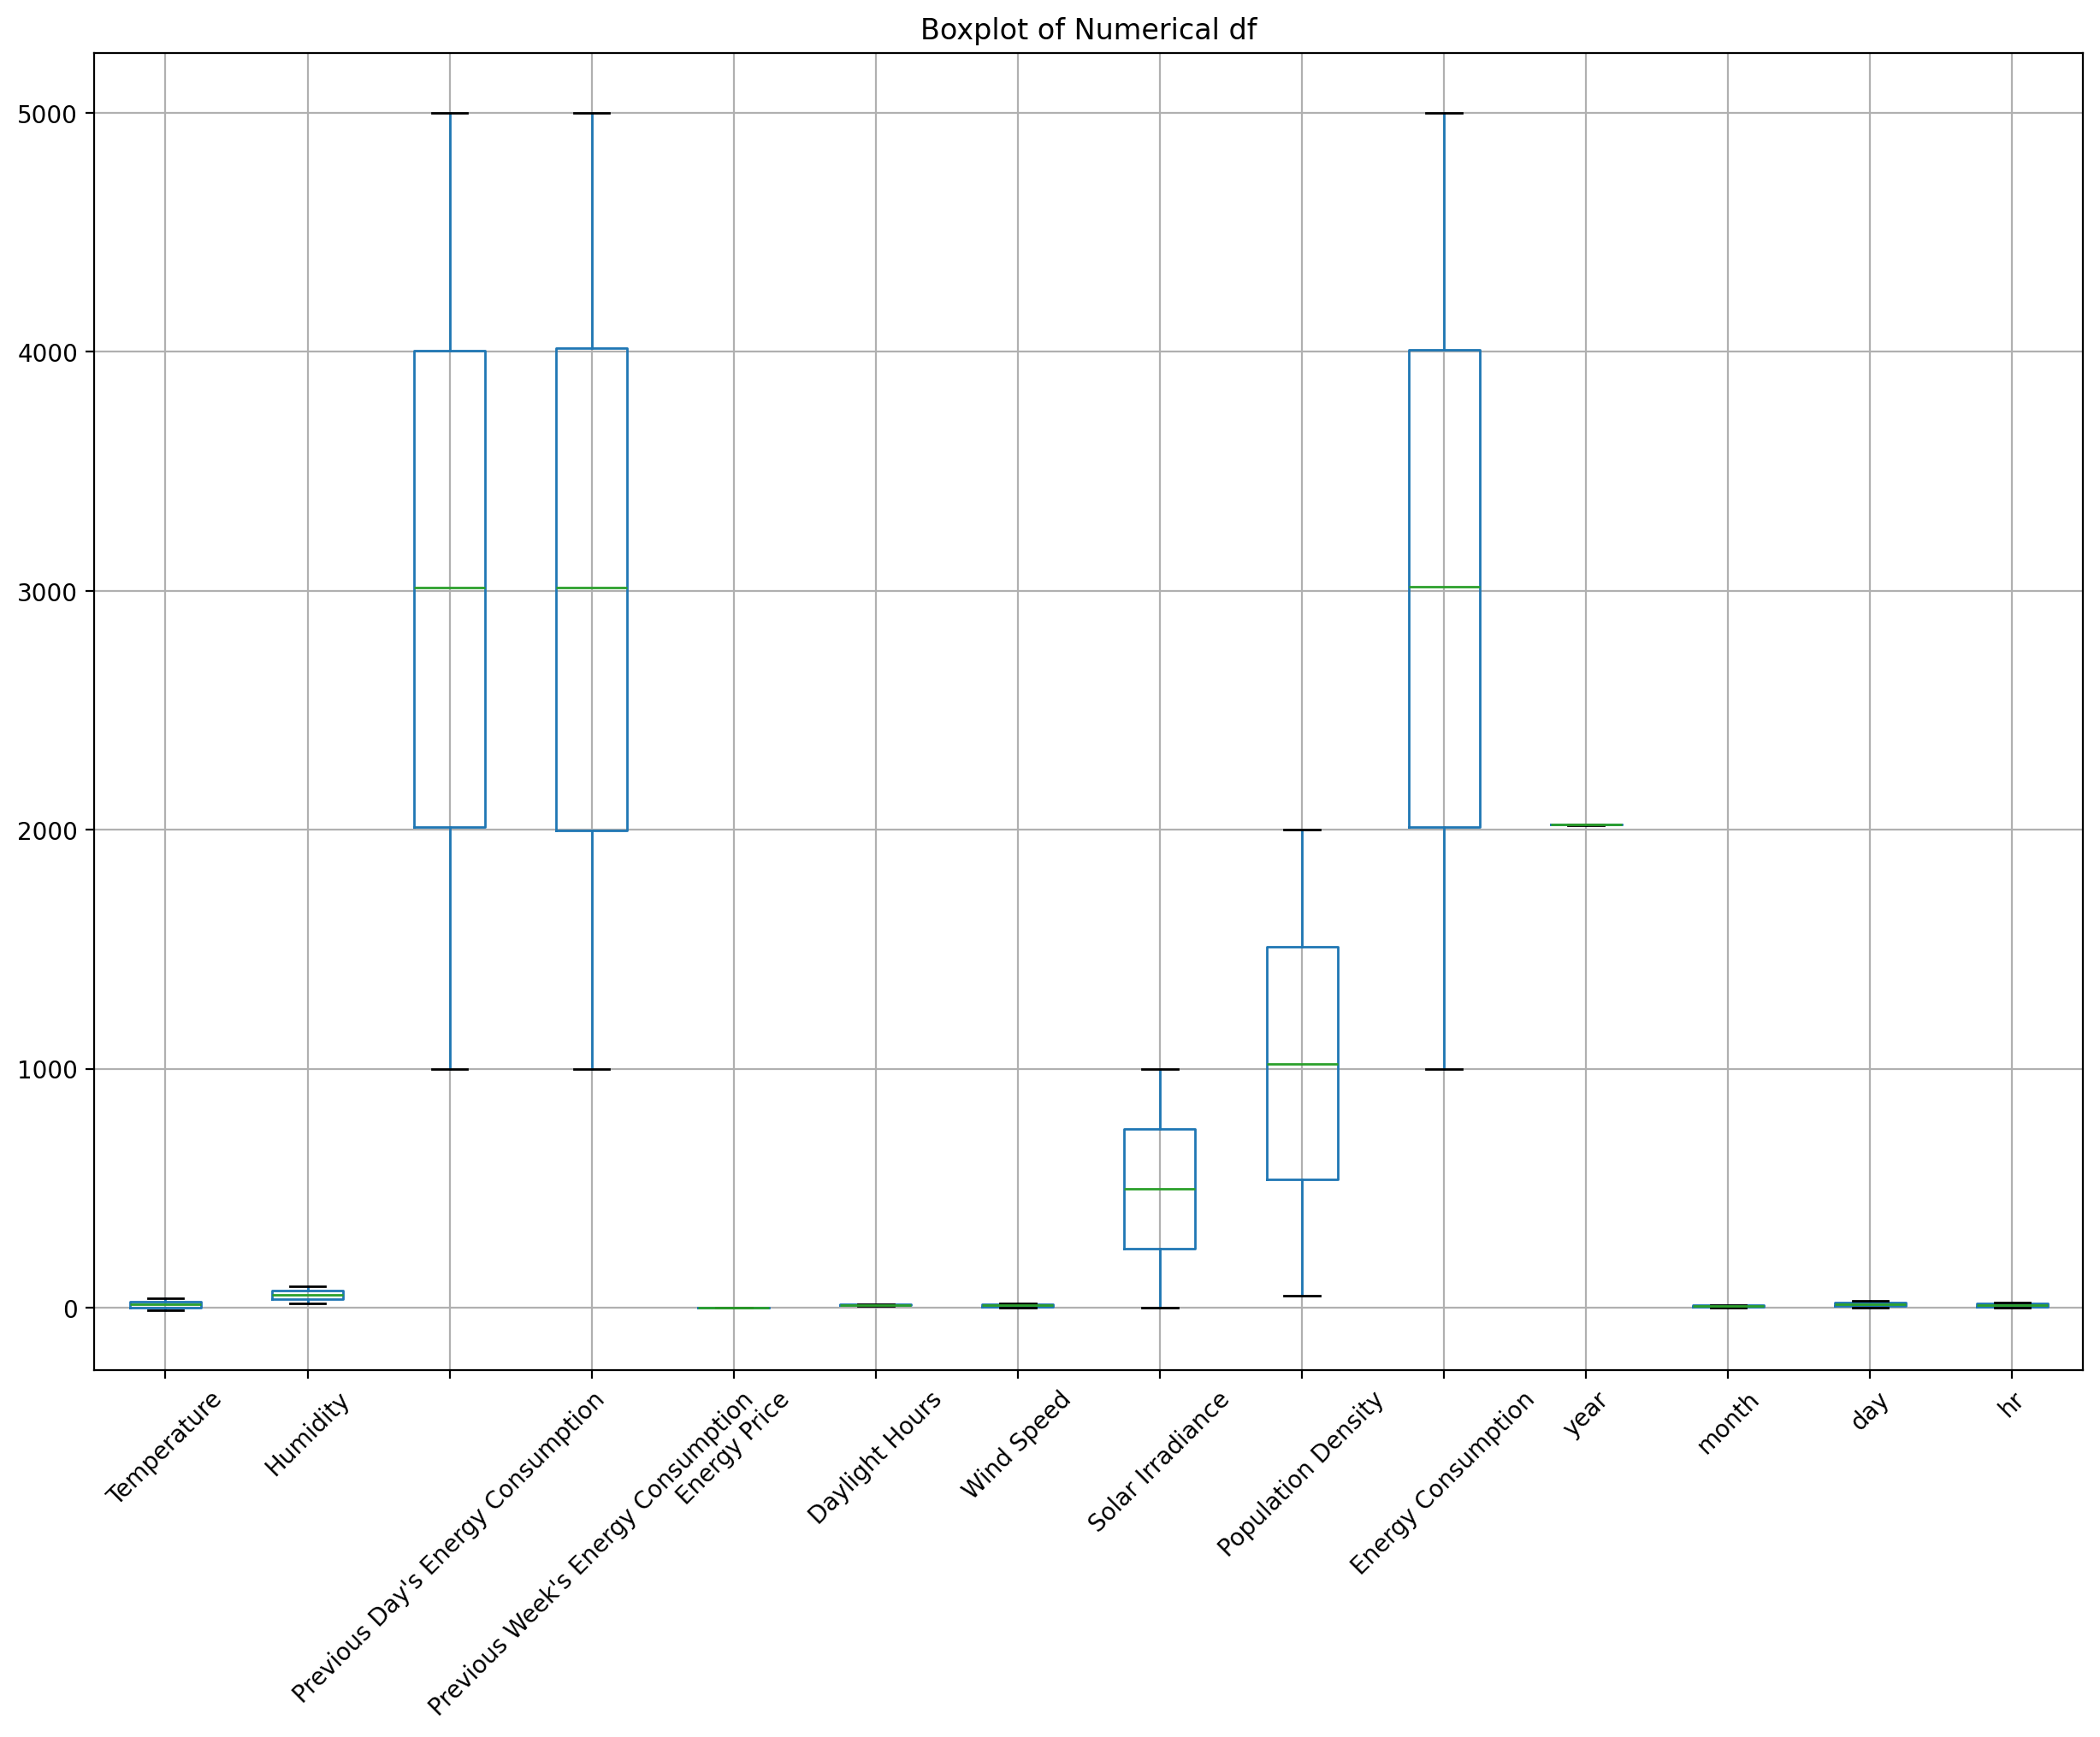

In [32]:
df.boxplot(column=numeric_df, figsize=(15, 10))
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical df")
plt.show()

# Data Preprocessing

In [33]:
df

,Temperature,Humidity,Day of Week,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption,year,month,day,hr
0,17.440675,73.264794,Wednesday,Fall,1,4437.698981,1799.303909,0.123206,12.228164,0.059692,169.032542,1469.402213,1367.517344,2020,1,1,0
1,25.759468,29.280938,Wednesday,Spring,1,2240.248004,2109.917892,0.096013,14.950992,19.246831,705.612502,169.805891,4078.500517,2020,1,1,1
2,20.138169,55.772252,Wednesday,Winter,0,1443.646518,2814.549791,0.161145,11.384525,10.978002,268.142230,1988.009121,4614.282050,2020,1,1,2
3,17.244159,87.520015,Wednesday,Summer,0,2325.184898,4680.163261,0.272355,10.109367,2.472984,262.186871,174.970181,3578.730578,2020,1,1,3
4,11.182740,26.383045,Wednesday,Fall,0,1552.041035,4080.463060,0.163503,9.012346,4.509169,486.224719,1004.081112,4194.210499,2020,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,16.224974,45.931201,Monday,Summer,1,3299.135828,3069.518353,0.135656,12.340619,3.685611,666.593466,1538.228889,1087.122191,2024,12,30,20
43821,-2.638805,64.145829,Monday,Fall,0,1435.657343,1185.862843,0.238843,11.169718,6.561095,772.779958,1641.830840,4277.546615,2024,12,30,21
43822,23.730335,70.776912,Monday,Spring,0,3441.205510,3003.358652,0.209155,15.948723,7.276048,567.131701,1800.057131,2915.121073,2024,12,30,22
43823,12.921507,40.567168,Monday,Spring,0,1200.156417,4850.113450,0.286449,14.597026,7.211708,27.142705,926.475955,2944.563179,2024,12,30,23


In [34]:

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [35]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
	len(object_cols))


Categorical variables:
['Day of Week', 'Season']
No. of. categorical features:  2


In [36]:
df= pd.get_dummies(data = df, columns = ['Day of Week', 'Season'],dtype=int)
df

,Temperature,Humidity,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,...,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,17.440675,73.264794,1,4437.698981,1799.303909,0.123206,12.228164,0.059692,169.032542,1469.402213,...,0,0,0,0,0,1,1,0,0,0
1,25.759468,29.280938,1,2240.248004,2109.917892,0.096013,14.950992,19.246831,705.612502,169.805891,...,0,0,0,0,0,1,0,1,0,0
2,20.138169,55.772252,0,1443.646518,2814.549791,0.161145,11.384525,10.978002,268.142230,1988.009121,...,0,0,0,0,0,1,0,0,0,1
3,17.244159,87.520015,0,2325.184898,4680.163261,0.272355,10.109367,2.472984,262.186871,174.970181,...,0,0,0,0,0,1,0,0,1,0
4,11.182740,26.383045,0,1552.041035,4080.463060,0.163503,9.012346,4.509169,486.224719,1004.081112,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,16.224974,45.931201,1,3299.135828,3069.518353,0.135656,12.340619,3.685611,666.593466,1538.228889,...,1,0,0,0,0,0,0,0,1,0
43821,-2.638805,64.145829,0,1435.657343,1185.862843,0.238843,11.169718,6.561095,772.779958,1641.830840,...,1,0,0,0,0,0,1,0,0,0
43822,23.730335,70.776912,0,3441.205510,3003.358652,0.209155,15.948723,7.276048,567.131701,1800.057131,...,1,0,0,0,0,0,0,1,0,0
43823,12.921507,40.567168,0,1200.156417,4850.113450,0.286449,14.597026,7.211708,27.142705,926.475955,...,1,0,0,0,0,0,0,1,0,0


In [37]:
df.columns

Index(['Temperature', 'Humidity', 'Holiday Indicator',
       'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption', 'year', 'month', 'day', 'hr',
       'Day of Week_Friday', 'Day of Week_Monday', 'Day of Week_Saturday',
       'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday',
       'Day of Week_Wednesday', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

In [38]:
x=df.drop(columns=['Energy Consumption'])
y=df['Energy Consumption']
x

,Temperature,Humidity,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,...,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,17.440675,73.264794,1,4437.698981,1799.303909,0.123206,12.228164,0.059692,169.032542,1469.402213,...,0,0,0,0,0,1,1,0,0,0
1,25.759468,29.280938,1,2240.248004,2109.917892,0.096013,14.950992,19.246831,705.612502,169.805891,...,0,0,0,0,0,1,0,1,0,0
2,20.138169,55.772252,0,1443.646518,2814.549791,0.161145,11.384525,10.978002,268.142230,1988.009121,...,0,0,0,0,0,1,0,0,0,1
3,17.244159,87.520015,0,2325.184898,4680.163261,0.272355,10.109367,2.472984,262.186871,174.970181,...,0,0,0,0,0,1,0,0,1,0
4,11.182740,26.383045,0,1552.041035,4080.463060,0.163503,9.012346,4.509169,486.224719,1004.081112,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,16.224974,45.931201,1,3299.135828,3069.518353,0.135656,12.340619,3.685611,666.593466,1538.228889,...,1,0,0,0,0,0,0,0,1,0
43821,-2.638805,64.145829,0,1435.657343,1185.862843,0.238843,11.169718,6.561095,772.779958,1641.830840,...,1,0,0,0,0,0,1,0,0,0
43822,23.730335,70.776912,0,3441.205510,3003.358652,0.209155,15.948723,7.276048,567.131701,1800.057131,...,1,0,0,0,0,0,0,1,0,0
43823,12.921507,40.567168,0,1200.156417,4850.113450,0.286449,14.597026,7.211708,27.142705,926.475955,...,1,0,0,0,0,0,0,1,0,0


In [39]:
#x  scaling with minmaxscaler

scaler=MinMaxScaler()
x[:]=scaler.fit_transform(x)

x

C:\Users\dell\AppData\Local\Temp\ipykernel_4612\2251396651.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 1. 1. 1.]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  x[:]=scaler.fit_transform(x)
C:\Users\dell\AppData\Local\Temp\ipykernel_4612\2251396651.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 1. 1. 1.]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  x[:]=scaler.fit_transform(x)
C:\Users\dell\AppData\Local\Temp\ipykernel_4612\2251396651.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.         ... 0.96666667 0.96666667 1.        ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  x[:

,Temperature,Humidity,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,...,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,0.548793,0.760949,1,0.859438,0.199815,0.292810,0.528527,0.002964,0.169016,0.727901,...,0,0,0,0,0,1,1,0,0,0
1,0.715185,0.132586,1,0.310027,0.277470,0.184035,0.868887,0.962377,0.705654,0.061434,...,0,0,0,0,0,1,0,1,0,0
2,0.602748,0.511047,0,0.110859,0.453630,0.444572,0.423071,0.548912,0.268136,0.993856,...,0,0,0,0,0,1,0,0,0,1
3,0.544862,0.964602,0,0.331263,0.920041,0.889424,0.263673,0.123636,0.262180,0.064082,...,0,0,0,0,0,1,0,0,1,0
4,0.423622,0.091186,0,0.137960,0.770113,0.454003,0.126543,0.225451,0.486242,0.489272,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,0.524477,0.370455,1,0.574772,0.517374,0.342612,0.542585,0.184271,0.666630,0.763197,...,1,0,0,0,0,0,0,0,1,0
43821,0.147165,0.630674,0,0.108861,0.046453,0.755373,0.396219,0.328053,0.772828,0.816327,...,1,0,0,0,0,0,1,0,0,0
43822,0.674598,0.725407,0,0.610292,0.500833,0.636618,0.993606,0.363803,0.567158,0.897469,...,1,0,0,0,0,0,0,1,0,0
43823,0.458401,0.293824,0,0.049981,0.962529,0.945799,0.824641,0.360586,0.027111,0.449474,...,1,0,0,0,0,0,0,1,0,0


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
y


0        1367.517344
1        4078.500517
2        4614.282050
3        3578.730578
4        4194.210499
            ...     
43820    1087.122191
43821    4277.546615
43822    2915.121073
43823    2944.563179
43824    1473.671093
Name: Energy Consumption, Length: 43825, dtype: float64

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(35060, 25)
(35060,)
(8765, 25)
(8765,)


In [45]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35060 entries, 6670 to 15795
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Temperature                         35060 non-null  float64
 1   Humidity                            35060 non-null  float64
 2   Holiday Indicator                   35060 non-null  int64  
 3   Previous Day's Energy Consumption   35060 non-null  float64
 4   Previous Week's Energy Consumption  35060 non-null  float64
 5   Energy Price                        35060 non-null  float64
 6   Daylight Hours                      35060 non-null  float64
 7   Wind Speed                          35060 non-null  float64
 8   Solar Irradiance                    35060 non-null  float64
 9   Population Density                  35060 non-null  float64
 10  year                                35060 non-null  float64
 11  month                               35060 n

# Feature Selection  

In [43]:
#RFE for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=7)

# Fit RFE to the data
rfe.fit(x_train, y_train)

# Get the selected features
selected_features_rfe =x_train.columns[rfe.support_]
selected_features_rfe



Index(['Day of Week_Monday', 'Day of Week_Saturday', 'Day of Week_Wednesday',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')

In [48]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)


feature_importances = rf.feature_importances_

selected_features_rf = x_train.columns[feature_importances.argsort()[-10:][::-1]]
selected_features_rf



Index(['Solar Irradiance', 'Population Density',
       'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Humidity', 'Wind Speed',
       'Daylight Hours', 'Temperature', 'Energy Price', 'day'],
      dtype='object')

In [49]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)

selector.fit(x_train, y_train)

selected_features_anova = x_train.columns[selector.get_support()]
selected_features_anova


Index(['Temperature', 'Holiday Indicator',
       'Previous Week's Energy Consumption', 'Daylight Hours', 'Wind Speed',
       'day', 'Day of Week_Tuesday', 'Day of Week_Wednesday', 'Season_Fall',
       'Season_Spring'],
      dtype='object')

In [50]:

 #Lasso Regression for Feature Selection:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

selected_features_lasso = x_train.columns[lasso.coef_ != 0]
selected_features_lasso



Index(['Temperature', 'Humidity', 'Holiday Indicator',
       'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density', 'year', 'month',
       'day', 'hr', 'Day of Week_Monday', 'Day of Week_Saturday',
       'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday',
       'Day of Week_Wednesday', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

# Model Selection , Training and Evaluation

In [ ]:
 pip install statsmodels

In [60]:
#  model bulilding of selected features rfe 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# SVR model building

svr_model=SVR()
svr_model.fit(x_train[selected_features_rfe],y_train)
predictions=svr_model.predict(x_test[selected_features_rfe])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print('SVR model building of selected feature RFE :')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

SVR model building of selected feature RFE :
mean_squared_error of svr: 1348195.100198094
mean_absolute_error of svr 1009.2781327131665
r2_score of svr: 0.0003077101954047645


In [52]:
svr_model.fit(x_train[selected_features_rf],y_train)
predictions=svr_model.predict(x_test[selected_features_rf])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print('SVR model building of selected feature Random Forest:')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

SVR model building of selected feature Random Forest:
mean_squared_error of svr: 1348615.6800621976
mean_absolute_error of svr 1009.5756896192923
r2_score of svr: -4.151527968732083e-06


In [53]:
svr_model.fit(x_train[selected_features_anova],y_train)
predictions=svr_model.predict(x_test[selected_features_anova])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print('SVR model building of selected feature selct K best:')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

SVR model building of selected feature selct K best:
mean_squared_error of svr: 1348095.5306164664
mean_absolute_error of svr 1009.3322810299011
r2_score of svr: 0.0003815414554630969


In [63]:
svr_model.fit(x_train[selected_features_lasso],y_train)
predictions=svr_model.predict(x_test[selected_features_lasso])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print('SVR model building of selected feature Lasso:')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

SVR model building of selected feature Lasso:
mean_squared_error of svr: 1348420.8418267232
mean_absolute_error of svr 1009.5037707528707
r2_score of svr: 0.00014032183626044858


In [59]:
# random forst model building

rf_model=RandomForestRegressor()
rf_model.fit(x_train[selected_features_rfe],y_train)
predictions=rf_model.predict(x_test[selected_features_rfe])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)
print('Random Forest model building of selected feature RFE :')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

Random Forest model building of selected feature RFE :
mean_squared_error of svr: 1348334.389799048
mean_absolute_error of svr 1009.2805365022933
r2_score of svr: 0.0002044263753528952


In [64]:
rf_model.fit(x_train[selected_features_rf],y_train)
predictions=rf_model.predict(x_test[selected_features_rf])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print('Random Forest building of selected feature Random Forest:')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

Random Forest building of selected feature Random Forest:
mean_squared_error of svr: 1374009.415522395
mean_absolute_error of svr 1015.5387825376915
r2_score of svr: -0.01883371228306019


In [66]:
rf_model.fit(x_train[selected_features_anova],y_train)
predictions=rf_model.predict(x_test[selected_features_anova])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print('Random Forest model building of selected feature selct K best:')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

Random Forest model building of selected feature selct K best:
mean_squared_error of svr: 1394403.1241585454
mean_absolute_error of svr 1019.886964952415
r2_score of svr: -0.033955732294174146


In [67]:
rf_model.fit(x_train[selected_features_lasso],y_train)
predictions=rf_model.predict(x_test[selected_features_lasso])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print('Random Forest model building of selected feature Lasso:')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

SVR model building of selected feature Lasso:
mean_squared_error of svr: 1366663.4840526057
mean_absolute_error of svr 1014.6388499077717
r2_score of svr: -0.01338667346004252


In [68]:
# Gradient Boosting Regressor model building

gd_model=GradientBoostingRegressor()
gd_model.fit(x_train[selected_features_rfe],y_train)
predictions=gd_model.predict(x_test[selected_features_rfe])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)
print('Gradient Decent model building of selected feature RFE :')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

Gradient Decent model building of selected feature RFE :
mean_squared_error of svr: 1348322.022499039
mean_absolute_error of svr 1009.2642662338069
r2_score of svr: 0.00021359677989063464


In [69]:
gd_model.fit(x_train[selected_features_rf],y_train)
predictions=gd_model.predict(x_test[selected_features_rf])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print('Gradient Decent building of selected feature Random Forest:')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

Gradient Decent building of selected feature Random Forest:
mean_squared_error of svr: 1349003.74975516
mean_absolute_error of svr 1009.166999949585
r2_score of svr: -0.0002919068238487199


In [75]:
#Linear Regression model builiding

gd_model.fit(x_train[selected_features_anova],y_train)
predictions=gd_model.predict(x_test[selected_features_anova])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print('Gradient Decent model building of selected feature selct K best:')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

Gradient Decent model building of selected feature selct K best:
mean_squared_error of svr: 1349209.5799396567
mean_absolute_error of svr 1009.6405677777446
r2_score of svr: -0.0004445307641227636


In [76]:
gd_model.fit(x_train[selected_features_lasso],y_train)
predictions=gd_model.predict(x_test[selected_features_lasso])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print('Gradient Decent model building of selected feature Lasso:')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

Gradient Decent model building of selected feature Lasso:
mean_squared_error of svr: 1348856.6896320097
mean_absolute_error of svr 1009.1228056770186
r2_score of svr: -0.0001828611291792015


In [77]:
lr_model=LinearRegression()
lr_model.fit(x_train[selected_features_rfe],y_train)
predictions=lr_model.predict(x_test[selected_features_rfe])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)
print('Linear Regression model building of selected feature RFE :')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

Linear Regression model building of selected feature RFE :
mean_squared_error of svr: 1348354.4340984933
mean_absolute_error of svr 1009.4918151326303
r2_score of svr: 0.00018956344371401368


In [78]:
lr_model.fit(x_train[selected_features_rf],y_train)
predictions=lr_model.predict(x_test[selected_features_rf])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print('Linear Regression building of selected feature Random Forest:')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

Linear Regression building of selected feature Random Forest:
mean_squared_error of svr: 1348180.0104610939
mean_absolute_error of svr 1009.3476702689079
r2_score of svr: 0.00031889929832606967


In [79]:
lr_model.fit(x_train[selected_features_anova],y_train)
predictions=lr_model.predict(x_test[selected_features_anova])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print('Linear Regression building of selected feature selct K best:')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

Linear Regression building of selected feature selct K best:
mean_squared_error of svr: 1347451.7808102688
mean_absolute_error of svr 1009.0407418415609
r2_score of svr: 0.0008588846216891488


In [80]:
lr_model.fit(x_train[selected_features_lasso],y_train)
predictions=lr_model.predict(x_test[selected_features_lasso])

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print('Linear Regression model building of selected feature Lasso:')
print('mean_squared_error of svr:',mse)
print('mean_absolute_error of svr',mae)
print('r2_score of svr:',r2)

Linear Regression model building of selected feature Lasso:
mean_squared_error of svr: 1347664.0626215278
mean_absolute_error of svr 1009.0950612830288
r2_score of svr: 0.0007014767732625993


# Limitations:

**Limited correlation:**  There are no missing values and no outliers in the energy consumption data set. But there is limit of correlation between the features. Because of that, it is not possible to select good features,build the model and unable to evaluate. Due to lack of experience in doing such bad data analysis and due to time constraints, it was not possible to do it.

**Arima and sarima:** Arima and Sarima's time series forecasting could not be done as it was not taught in the class